##   D206 Performance Assessment
Submitted by Matthew Heino

This asssessment is to look at ways to clean up data.  The purpose of this notebook is to walk through the steps that are required to transform data into a form that is more usable.  Concepts that will illustrated in this assessment will be: <br>
- Changing data types to more appropriate data types.
- Visualizing data that may be missing from the data frame.
- Change dataframe columns names to names that make it easier for the user to understand.
- Perform PCA analysis on the applicalbe quanititiave varialbes of the cleaned dataset.

<br>
This submission will follow a structured approach that was laid out in the accompanying document.  THere will be notes were appropriate regarding findings.  A more indepth explanation of metods, findins will be found in the Word document that accompanies this Jupyter Notebook. 


For full citations please review section G of the document for a complete listing of web reference sources used.

In [1]:
# Imports for the assessment
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA

Import data into the frame.


In [2]:
medical_df = pd.read_csv('medical_raw_data.csv') 
print(medical_df.head(5))
print(medical_df.dtypes) 
medical_df.shape

   Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1           2          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2           3          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3           4          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4           5          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat  ...  TotalCharge  Additional_charges 

(10000, 53)

## Step 1: Detect duplicate elements and intial missing values in the dataframe
    
   ### Actions:
     
        1) Look for duplicates in the dataframe.
        2) Check for initial missing values.
    
        Note: This file assumes that the data file currently stored in the local 
        directory. This sections corresponds to section C of the document.

Look for duplicated data in the (How to Count Duplicates in Pandas Dataframe?, n.d.).  No duplicated values were found in the given data set.

In [3]:
#print("Number of duplicted rows: ", medical_df.duplicated().sum())
#print("Number of duplicated rows: ", medical_df.duplicated().value_counts())
#print("Number of Misisng values: ",medical_df.isna().sum() )

## Step 2:     Fix formatting and inconsistencies in the data.  
            
   **Note:**   This corresponds to section C & D of the accompanying document. 

   **Actions:**
        1. Look for unique categories in the each of the categorical columns of the dataframe. Check the data for errors in expected format
        2. Reduce the number of categories where appropriate.
        3. Change the data type of columns to a more appropriate type.
  
Check for uniqueness among the column's values as well as the. Will check all columns with type 
object as they may be categorical and if catergorical see if there are too 
many categories. Columns that will be skipped are the following: Address related columns, IDs and similar items. The flow of this section will follow the flow of the data dictionary. Columns will be addressed as they are found in the data dictionary. 

ZIP code checked for right length.<br>

**Note:** This will show an error since this is currently stored as an integer. This error will be    noted in the assessment document in greater detail.
<br>   
**Note:** this corresponds to Section D2 of the included document.
**Note:** A Prpoer reference for websites used can be found in the document in Section G.

In [4]:
print("Minimum ZIP value: ", medical_df['Zip'].min()) 
# Convert Zipcode from int64 to a String to get back leading zero in Zipcode.
medical_df = medical_df.astype({'Zip': str})

# Check data types of the columns.
print(medical_df.Zip.dtypes)

# Check the Zip code to appropriate length. Does not return appropriate length.
print(medical_df.Zip.str.len().min())

# Add appropriate amount of zeroes to the left of the Zip string.
medical_df['Zip'] = medical_df['Zip'].str.zfill(5)
print("Min Zip: ",medical_df.Zip.str.len().min())
print("Max Zip: ",medical_df.Zip.str.len().max())
print("Zip Type: ", medical_df.Zip.dtypes)
print("\nDatatype of the Zip column: ",medical_df['Zip'].dtypes) 

Minimum ZIP value:  610
object
3
Min Zip:  5
Max Zip:  5
Zip Type:  object

Datatype of the Zip column:  object


In [5]:
# Check Area for uniqueness
print("\nUnique values of Area: ",np.sort(medical_df.Area.unique()))     
# All values are acceptable      


Unique values of Area:  ['Rural' 'Suburban' 'Urban']


Tmezone checked for the amount of timezone categories.
Found to have 26 will be reduced to 7 timezones.  THis reduced number of timezones will make it easier to grouped analysis if required later on.

**Note:** This corresponds to Section  C & D of the included document.

In [6]:
print(np.sort(medical_df.Timezone.unique())) 
print("\nUnique Time Zones Before change :",medical_df.Timezone.unique().size)  

timezone_replace_dict = {
            'America/Adak': 'Hawaii-Aleutian', 
            'America/Anchorage' : 'Alaska','America/Boise' : 'Mountain',
            'America/Chicago' :'Central','America/Denver' :  'Mountain',
            'America/Detroit' :'Eastern', 'America/Indiana/Indianapolis' : 'Eastern',
            'America/Indiana/Knox' : 'Central', 'America/Indiana/Marengo' : 'Eastern',
            'America/Indiana/Tell_City' : 'Central','America/Indiana/Vevay' : 'Eastern',
            'America/Indiana/Vincennes' : 'Eastern','America/Indiana/Winamac' : 'Eastern',
            'America/Kentucky/Louisville' : 'Eastern', 'America/Los_Angeles' : 'Pacific',
            'America/Menominee' : 'Central','America/New_York': 'Eastern',
            'America/Nome' : 'Alaska','America/North_Dakota/Beulah' : 'Central',
            'America/North_Dakota/New_Salem' : 'Central','America/Phoenix' : 'Mountain',
            'America/Puerto_Rico' : 'Atlantic','America/Sitka' : 'Alaska',
            'America/Toronto' : 'Eastern', 'America/Yakutat' : 'Alaska', 
            'Pacific/Honolulu' : 'Hawaii-Aleutian'
    }

medical_df['Timezone'].replace(timezone_replace_dict, inplace=True)    
print("Unique Time Zones after change :",np.sort(medical_df.Timezone.unique()))

['America/Adak' 'America/Anchorage' 'America/Boise' 'America/Chicago'
 'America/Denver' 'America/Detroit' 'America/Indiana/Indianapolis'
 'America/Indiana/Knox' 'America/Indiana/Marengo'
 'America/Indiana/Tell_City' 'America/Indiana/Vevay'
 'America/Indiana/Vincennes' 'America/Indiana/Winamac'
 'America/Kentucky/Louisville' 'America/Los_Angeles' 'America/Menominee'
 'America/New_York' 'America/Nome' 'America/North_Dakota/Beulah'
 'America/North_Dakota/New_Salem' 'America/Phoenix' 'America/Puerto_Rico'
 'America/Sitka' 'America/Toronto' 'America/Yakutat' 'Pacific/Honolulu']

Unique Time Zones Before change : 26
Unique Time Zones after change : ['Alaska' 'Atlantic' 'Central' 'Eastern' 'Hawaii-Aleutian' 'Mountain'
 'Pacific']


In [7]:
#Check for the range of values to make sure they are acceptable
print("\nChildren minimum value (Current): ", medical_df.Children.min())
print("Children maximum value (Current): ", medical_df.Children.max())
print("\nAge minimum value (Current): ", medical_df.Age.min())
print("Age maximum value (Current): ", medical_df.Age.max())



Children minimum value (Current):  0.0
Children maximum value (Current):  10.0

Age minimum value (Current):  18.0
Age maximum value (Current):  89.0


In [8]:
# Check the uniqueness and values that are stored in Education column
print("Unique Education categories :", medical_df.Education.unique())

Unique Education categories : ['Some College, Less than 1 Year'
 'Some College, 1 or More Years, No Degree'
 'GED or Alternative Credential' 'Regular High School Diploma'
 "Bachelor's Degree" "Master's Degree" 'Nursery School to 8th Grade'
 '9th Grade to 12th Grade, No Diploma' 'Doctorate Degree'
 "Associate's Degree" 'Professional School Degree'
 'No Schooling Completed']


In [9]:
# Check the uniqueness and values that are stored in Employment column
print("\nUnique Employment categories :", medical_df.Employment.unique())


Unique Employment categories : ['Full Time' 'Retired' 'Unemployed' 'Student' 'Part Time']


In [10]:
# check the uniqueness and values that are stored in Income column
# Note: missing salaries
print("Unique Income categories :",medical_df.Income.nunique())
print("Minimum income :", medical_df.Income.min())
print("Maximum income :", medical_df.Income.max())


Unique Income categories : 7531
Minimum income : 154.08
Maximum income : 207249.13


In [11]:
# check the uniqueness and values that are stored in Marital column
print("\nUnique Marital categories :",medical_df.Marital.unique())

# check the uniqueness and values that are stored in Gender column
print("\nUnique Gender categories :",medical_df.Gender.unique())

#Need to replace values to meet the data dictionary
# check the uniqueness and values that are stored in Gender column
print("\nUnique Gender categories :",medical_df.Gender.unique())
gen_repl = {'Prefer not to answer' : 'nonbinary'}
medical_df['Gender'].replace(gen_repl, inplace=True)
print("Unique Gender categories :",medical_df.Gender.unique())
# check to see that columns were changed. 
gender_df = medical_df[medical_df['Gender'] == 'nonbinary']
print(gender_df['Gender'].head(2))

# check the uniqueness and values that are stored in ReAdmis column
print("\nUnique ReAdmis categories :",medical_df.ReAdmis.unique())

# Check of the doctor vistits
print("\nVitD_levels minimum value: ", medical_df.VitD_levels.min())
print("VitD levels maximum value: ", medical_df.VitD_levels.max())

# Check of the doctor vistits
print("\nVisits minimum value: ", medical_df.Doc_visits.min())
print("Visits maximum value: ", medical_df.Doc_visits.max())


Unique Marital categories : ['Divorced' 'Married' 'Widowed' 'Never Married' 'Separated']

Unique Gender categories : ['Male' 'Female' 'Prefer not to answer']

Unique Gender categories : ['Male' 'Female' 'Prefer not to answer']
Unique Gender categories : ['Male' 'Female' 'nonbinary']
19    nonbinary
55    nonbinary
Name: Gender, dtype: object

Unique ReAdmis categories : ['No' 'Yes']

VitD_levels minimum value:  9.519011638
VitD levels maximum value:  53.01912416

Visits minimum value:  1
Visits maximum value:  9


All values are here.  Will be checked for Nulls in step 4.

In [12]:
# Check of the full meals
print("Full meals data type (Current): ", medical_df.Full_meals_eaten.dtypes)
print("Full meals minimum value: ", medical_df.Full_meals_eaten.min())
print("Full meals value: ", medical_df.Full_meals_eaten.max())

# Check of the Vitamin supplements count
print("\nVit D supplements data type (Current): ", medical_df.VitD_supp.dtypes)
print("Vit D minimum value: ", medical_df.VitD_supp.min())
print("Vit D maximum value: ", medical_df.VitD_supp.max())

# Check the uniqueness and values that are stored in Soft drink column note there are missing values nan within this column.
print("\nUnique Soft drinks categories :",medical_df.Soft_drink.unique())

# Check the uniqueness and values that are stored in initial admission column note there are missing values nan within this column.
print("\nUnique Initial admission categories : ", medical_df.Initial_admin.unique())

# Check the uniqueness and values that are stored in high blood pressure column
print("\nUnique High Blood pressure categories : ", medical_df.HighBlood.unique())

# Check the uniqueness and values that are stored in Stoke column
print("\nUnique Stroke categories : ", medical_df.Stroke.unique())

# check the uniqueness and values that are stored in Complication column
print("\nUnique Complication risk categories : ", medical_df.Complication_risk.unique())

# check the uniqueness and values that are stored in Overweight column
print("\nUnique Overweight categories : ", medical_df.Overweight.unique())

Full meals data type (Current):  int64
Full meals minimum value:  0
Full meals value:  7

Vit D supplements data type (Current):  int64
Vit D minimum value:  0
Vit D maximum value:  5

Unique Soft drinks categories : [nan 'No' 'Yes']

Unique Initial admission categories :  ['Emergency Admission' 'Elective Admission' 'Observation Admission']

Unique High Blood pressure categories :  ['Yes' 'No']

Unique Stroke categories :  ['No' 'Yes']

Unique Complication risk categories :  ['Medium' 'High' 'Low']

Unique Overweight categories :  [ 0.  1. nan]


All values are fine except for soft drinks. Will be addressed in a subsequent step.

Correct problems with this column not being in the same format as the 
other columns storing Yes and No values.

In [13]:
repl_dict = {'0.0' : 'No', '1.0' : 'Yes',np.NaN : np.NaN }
print(medical_df['Overweight'].isnull().sum())

medical_df['Overweight'] = medical_df['Overweight'].astype(str)
medical_df['Overweight'].replace(repl_dict, inplace=True)

print("Unique Overweight categories : ", medical_df.Overweight.unique())
print("Overweight data type (Current): ", medical_df.Overweight.dtypes)

medical_df['Overweight'].replace('nan',np.NaN, inplace=True)

print("Unique Overweight categories : ", medical_df.Overweight.unique())
print(medical_df['Overweight'].isnull().sum())

982
Unique Overweight categories :  ['No' 'Yes' 'nan']
Overweight data type (Current):  object
Unique Overweight categories :  ['No' 'Yes' nan]
982


In [14]:
# Check the uniqueness and values that are stored in Arthritis column
print("Unique Arthritist categories: ", medical_df.Arthritis.unique())

# Check the uniqueness and values that are stored in Diabetes column
print("Unique Diabetes categories: ", medical_df.Diabetes.unique())

# check the uniqueness and values that are stored in column
print("Unique Hyperlipidemia categories: ", medical_df.Hyperlipidemia.unique())

# check the uniqueness and values that are stored in BackPain column
print("Unique BackPain categories: ", medical_df.BackPain.unique())

Unique Arthritist categories:  ['Yes' 'No']
Unique Diabetes categories:  ['Yes' 'No']
Unique Hyperlipidemia categories:  ['No' 'Yes']
Unique BackPain categories:  ['Yes' 'No']


Anxiety  was noticed to have values that are inconsistent.  This column has Yes and NO vlaues stored as 1 or zero.  This was noticed while looking at the CSV file.  It will be corrected in the same manner as the Overweight column.

In [15]:
repl_anx_dict = {'0.0' : 'No', '1.0' : 'Yes',np.NaN : np.NaN }

# To make sure the NULL values are retained for handling in Step 4
print("Sum of NULL values in Anxiety (Before): ",medical_df['Anxiety'].isnull().sum())

medical_df['Anxiety'] = medical_df['Anxiety'].astype(str)
medical_df['Anxiety'].replace(repl_anx_dict, inplace=True)

print("Unique Anxiety categories : ", medical_df.Anxiety.unique())
print("Anxiety data type (Current): ", medical_df.Anxiety.dtypes)

medical_df['Anxiety'].replace('nan',np.NaN, inplace=True)
print("Sum of NULL values in Anxiety (After): ", medical_df['Anxiety'].isnull().sum())

Sum of NULL values in Anxiety (Before):  984
Unique Anxiety categories :  ['Yes' 'nan' 'No']
Anxiety data type (Current):  object
Sum of NULL values in Anxiety (After):  984


In [16]:
# Check the uniqueness and values that are stored in Allergic rhinitis columns column
print("Unique Allergic rhinitis categories: ", medical_df.Allergic_rhinitis.unique())

# Check the uniqueness and values that are stored in Reflux esophagitis  column
print("\nUnique Reflux esophagitis categories: ", medical_df.Allergic_rhinitis.unique())

# Check the uniqueness and values that are stored Asthma column
print("\nUnique Asthma categories: ", medical_df.Asthma.unique())

# Check the uniqueness and values that are stored Services column
print("\nUnique Services categories: ", medical_df.Services.unique())

Unique Allergic rhinitis categories:  ['Yes' 'No']

Unique Reflux esophagitis categories:  ['Yes' 'No']

Unique Asthma categories:  ['Yes' 'No']

Unique Services categories:  ['Blood Work' 'Intravenous' 'CT Scan' 'MRI']


Look at the inital days a little closer to look for Nan values in the column.  Will deal with missing values in a Step 4 of the notebook.


In [17]:
# Check the uniqueness and values that are stored Initial days column
print("Unique Initial_days categories: ", medical_df.Initial_days.unique())
print("Sum of NULL values in Initial Days: ",medical_df['Initial_days'].isnull().sum())

# Check the uniqueness and values that are stored Total_Charge column
print("\nUnique Total Charge categories: ", medical_df.TotalCharge.unique())
print("Total Charge minimum value: ", medical_df.TotalCharge.min())
print("Total Charge maximum value: ", medical_df.TotalCharge.max())
print("Sum of NULL values in Total Charge: ", medical_df['TotalCharge'].isnull().sum())

# Check the uniqueness and values that are stored Additional_charges column
print("\nUnique Additional Charges categories: ", medical_df.Additional_charges.unique())
print("Sum of NULL values in Additional Charges: ",medical_df['Additional_charges'].isnull().sum())

Unique Initial_days categories:  [10.58576971 15.12956221  4.77217721 ... 68.66823748 63.35690285
 70.85059182]
Sum of NULL values in Initial Days:  1056

Unique Total Charge categories:  [3191.048774 4214.905346 2177.586768 ... 7725.953391 8462.831883
 8700.856021]
Total Charge minimum value:  1256.751699
Total Charge maximum value:  21524.22421
Sum of NULL values in Total Charge:  0

Unique Additional Charges categories:  [17939.40342  17612.99812  17505.19246  ... 15281.21466   7781.678412
 11643.18993 ]
Sum of NULL values in Additional Charges:  0


The Item columns will be given better and more descriptive names that will make it easier to access and use.


In [18]:
# Give the items more appropriate names for columns.
column_names = {'Item1':'admission', 'Item2':'treatment', 'Item3':'timely_visits'
                ,'Item4':'reliability', 'Item5':'options', 'Item6':'hours_of_treatment'
                , 'Item7':'courteous', 'Item8':'active_listening'}

medical_df =  medical_df.rename(columns= column_names)  
# Print the column names.
for col in medical_df.columns:
    print(col)

# Check to see if you can access by the new column name.
print("\nShow the admission Item column: \n",medical_df['admission'].head(5))

Unnamed: 0
CaseOrder
Customer_id
Interaction
UID
City
State
County
Zip
Lat
Lng
Population
Area
Timezone
Job
Children
Age
Education
Employment
Income
Marital
Gender
ReAdmis
VitD_levels
Doc_visits
Full_meals_eaten
VitD_supp
Soft_drink
Initial_admin
HighBlood
Stroke
Complication_risk
Overweight
Arthritis
Diabetes
Hyperlipidemia
BackPain
Anxiety
Allergic_rhinitis
Reflux_esophagitis
Asthma
Services
Initial_days
TotalCharge
Additional_charges
admission
treatment
timely_visits
reliability
options
hours_of_treatment
courteous
active_listening

Show the admission Item column: 
 0    3
1    3
2    2
3    3
4    2
Name: admission, dtype: int64


## Step 3:    Look for outliers and handle them.  
            
 **Note:**   This corresponds to section C & D of the accompanying document. 

 **Actions:**
   1. Find the outliers
   2. Remove the outliers if applicable. 
   
The flow of this section will follow the flow of the data dictionary. Columns will be addressed as they are found in the data dictionary. Only quantitative columns will be checked for outliers.  The following columns will be looked at for outliers: 
 * Population
 * Children
 * Age
 * Income
 * Vit D levels 
 * Doc visits
 * Full meals eaten
 * Iniital days
 * Total charge
 * Add'l charge. 

Basically process will be to view the quantitative columns will be teh same. The refenrence taht was used was found on the GeeksforGeeks site with the title "Boxplot using Seaborn in Python."  Will use the IQR method to find the outliers in the columns. This method was discussed in " How to Detect and Exclude Outliers in a Pandas DataFrame."


### Population 
View of the population sample relative to the boxplot. Boxplot were referenced using the information found on this webpage "Boxplot using Seaborn in Python" by GeeksForGeeks.

In [19]:
print("Description of Population",medical_df['Population'].describe())

Description of Population count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64


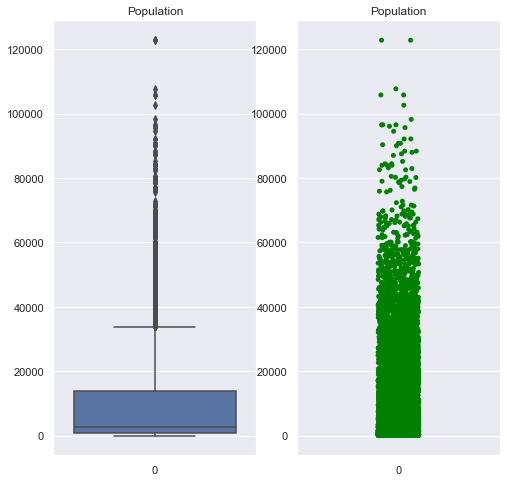

In [20]:
sns.set(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(figsize=(8,8), ncols=2, sharex= True,
                                    sharey=False)

sns.boxplot(data=medical_df['Population'], ax = ax1).set(title="Population")
sns.stripplot(data=medical_df['Population'], ax=ax2, color='green').set(title="Population")
plt.show()

Removing the outliers from the Population columns.  There were not missing vlaues in the data frame.  So dropping the outlieres is straightforward. 

In [21]:
# Calculate the bounds.
lower_bound = medical_df['Population'].quantile(0.25)
upper_bound = medical_df['Population'].quantile(0.75)
IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
threshold = 1.5
outliers = medical_df[(medical_df['Population']  < lower_bound - threshold * IQR ) 
                 |(medical_df['Population']  > upper_bound + threshold * IQR )] 

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)
print('Number of oultiers', len(outliers['Population']) )


Lower bound:  694.75
Upper bound:  13945.0
Number of oultiers 855


In [22]:
#Drop the outliers
medical_df = medical_df.drop(outliers.index)

# Show the outliers have been dropped.
print(medical_df.shape)
print("Description of Population:\n",medical_df['Population'].describe())

(9145, 53)
Description of Population:
 count     9145.000000
mean      6376.433898
std       8461.262344
min          0.000000
25%        605.000000
50%       2194.000000
75%       8905.000000
max      33806.000000
Name: Population, dtype: float64


### Children 
View of the population sample relative to the boxplot.

In [23]:
print('Desription of Children:\n',medical_df['Children'].describe())

Desription of Children:
 count    6782.000000
mean        2.095842
std         2.147959
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64


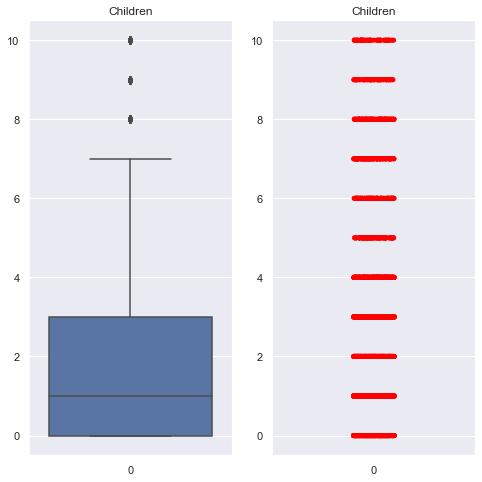

In [24]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['Children'], ax = ax1).set(title="Children")
sns.stripplot(data=medical_df['Children'], ax=ax2, color='red').set(title="Children")
plt.show()

In [25]:
# Calculate the bound.
lower_bound = medical_df['Children'].quantile(0.25)
upper_bound = medical_df['Children'].quantile(0.75)
IQR = upper_bound - lower_bound


# Identify the outliers in the dataframe
#threshold = 1.5
outliers = medical_df[(medical_df['Children']  < lower_bound - threshold * IQR ) 
                 |(medical_df['Children']  > upper_bound + threshold * IQR )] 

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)
print("\nOutliers shape: ", outliers.shape)

medical_df = medical_df.drop(outliers.index)

print("Shape after dropping Children outliers: ",medical_df.shape)
print('Desription of Children: \n',medical_df['Children'].describe())

Lower bound:  0.0
Upper bound:  3.0

Outliers shape:  (275, 53)
Shape after dropping Children outliers:  (8870, 53)
Desription of Children: 
 count    6507.000000
mean        1.816966
std         1.692237
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         7.000000
Name: Children, dtype: float64


### Age

View of the population sample relative to the boxplot.
This columns doee not ??????? 

In [26]:
print(medical_df['Age'].describe())

count    6734.000000
mean       53.280962
std        20.584040
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64


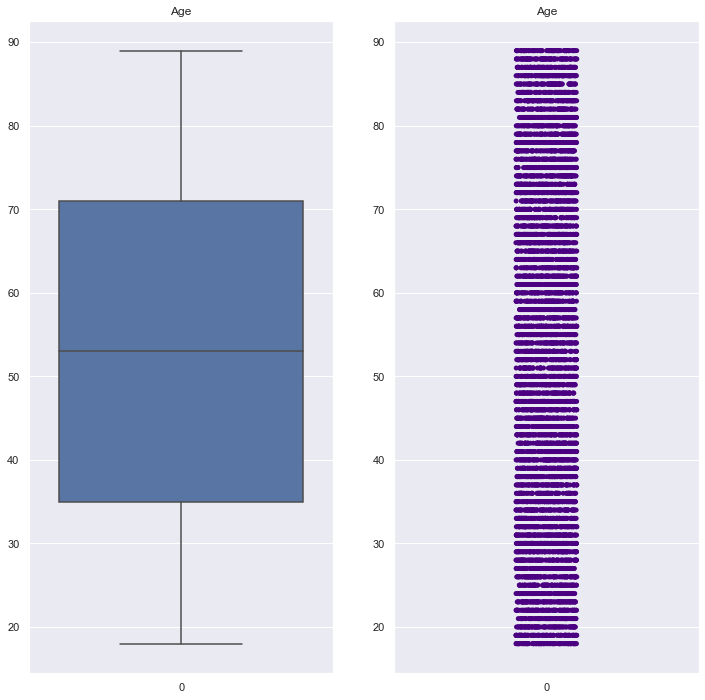

In [27]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 12), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['Age'], ax = ax1).set(title="Age")
sns.stripplot(data=medical_df['Age'], ax=ax2, color='indigo').set(title="Age")
plt.show()


In [28]:
# Calculate the bound.
lower_bound = medical_df['Age'].quantile(0.25)
upper_bound =medical_df['Age'].quantile(0.75)
IQR = upper_bound - lower_bound

outliers = medical_df[(medical_df['Age']  < lower_bound - threshold * IQR ) 
                 |(medical_df['Age']  > upper_bound + threshold * IQR )] 

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)
print("Outliers shape: ", outliers.shape)

medical_df = medical_df.drop(outliers.index)
print(medical_df.shape)
print("\n\n Age: \n",medical_df['Age'].describe())


Lower bound:  35.0
Upper bound:  71.0
Outliers shape:  (0, 53)
(8870, 53)


 Age: 
 count    6734.000000
mean       53.280962
std        20.584040
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64


### Income
View of the population sample relative to the boxplot.

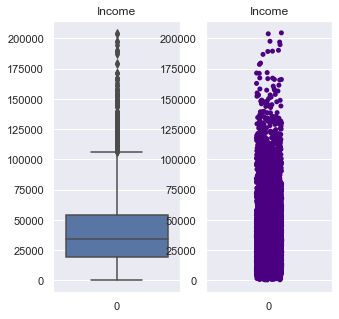

In [29]:
fig, (ax1, ax2) = plt.subplots(figsize= (5, 5), ncols=2, sharex= True,
                                    sharey=False)

sns.boxplot(data=medical_df['Income'], ax = ax1).set(title="Income")
sns.stripplot(data=medical_df['Income'], ax=ax2, color='indigo').set(title="Income")

plt.show()

In [30]:
print("Nulls in Income frame BEFORE: ", medical_df["Income"].isna().sum())
print("\nIncome: \n",medical_df['Income'].describe())

# Calculate the bound.
lower_bound = medical_df['Income'].quantile(0.25)
upper_bound = medical_df['Income'].quantile(0.75)
IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
# threshold = 1.5
outliers = medical_df[(medical_df['Income']  < lower_bound - threshold * IQR ) 
                 |(medical_df['Income']  > upper_bound + threshold * IQR )] 

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)
print("\nOutliers shape: ", outliers.shape)

medical_df= medical_df.drop(outliers.index)

print(medical_df.shape)
print("\nAge: \n",medical_df['Income'].describe())

Nulls in Income frame BEFORE:  2193

Income: 
 count      6677.000000
mean      40524.322339
std       28537.791372
min         300.790000
25%       19479.990000
50%       34027.020000
75%       54173.130000
max      204542.410000
Name: Income, dtype: float64
Lower bound:  19479.99
Upper bound:  54173.13

Outliers shape:  (221, 53)
(8649, 53)

Age: 
 count      6456.000000
mean      37475.368727
std       23345.563155
min         300.790000
25%       19008.830000
50%       32967.110000
75%       51578.100000
max      105811.110000
Name: Income, dtype: float64


### Vitamin D Levels

View of the population sample relative to the boxplot.

In [31]:
print(medical_df['VitD_levels'].describe())

count    8649.000000
mean       19.407663
std         6.746438
min         9.553535
25%        16.493079
50%        18.067273
75%        19.787886
max        53.019124
Name: VitD_levels, dtype: float64


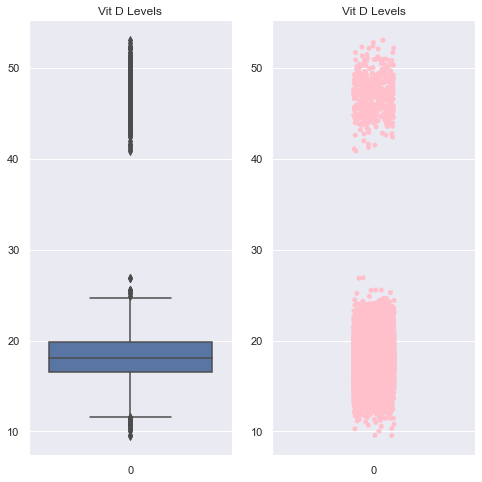

In [32]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), ncols=2, sharex= True,
                                    sharey=False)

sns.boxplot(data=medical_df['VitD_levels'], ax = ax1).set(title="Vit D Levels")
sns.stripplot(data=medical_df['VitD_levels'], ax=ax2, color='pink').set(title="Vit D Levels")

plt.show()

In [33]:
print("\nVitamin D levels: \n",medical_df['VitD_levels'].describe())

# Calculate the bound.
lower_bound = medical_df['VitD_levels'].quantile(0.25)
upper_bound = medical_df['VitD_levels'].quantile(0.75)
IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
# threshold = 1.5
outliers = medical_df[(medical_df['VitD_levels']  < lower_bound - threshold * IQR ) 
                 |(medical_df['VitD_levels']  > upper_bound + threshold * IQR )] 

print("\nOutliers shape:",outliers.shape)
print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)

medical_df= medical_df.drop(outliers.index)

print("\nVitamin D levels shape after drop",medical_df.shape)
print("\nVitamin D: \n",medical_df['VitD_levels'].describe())


Vitamin D levels: 
 count    8649.000000
mean       19.407663
std         6.746438
min         9.553535
25%        16.493079
50%        18.067273
75%        19.787886
max        53.019124
Name: VitD_levels, dtype: float64

Outliers shape: (465, 53)
Lower bound:  16.49307909
Upper bound:  19.78788646

Vitamin D levels shape after drop (8184, 53)

Vitamin D: 
 count    8184.000000
mean       17.955089
std         2.211621
min        11.593141
25%        16.414790
50%        17.920137
75%        19.449557
max        24.644049
Name: VitD_levels, dtype: float64


### Doc Visits

View of the population sample relative to the boxplot. 

In [34]:
print(medical_df['Doc_visits'].describe())

count    8184.000000
mean        5.005376
std         1.042642
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Doc_visits, dtype: float64


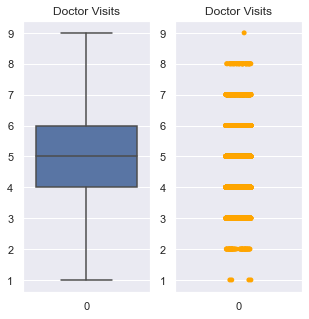

In [35]:
sns.set(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(figsize=(5, 5), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['Doc_visits'], ax = ax1).set(title="Doctor Visits")
sns.stripplot(data=medical_df['Doc_visits'], ax=ax2, color='orange').set(title="Doctor Visits")
plt.show()


In [36]:
print("\nDoctor visits: \n",medical_df['Doc_visits'].describe())

# Calculate the bound.
lower_bound = medical_df['Doc_visits'].quantile(0.25)
upper_bound = medical_df['Doc_visits'].quantile(0.75)
IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
# threshold = 1.5
outliers = medical_df[(medical_df['Doc_visits']  < lower_bound - threshold * IQR ) 
                 |(medical_df['Doc_visits']  > upper_bound + threshold * IQR )] 

print("\nOutliers shape: ",outliers.shape)

print("\nOutliers shape:",outliers.shape)
print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)

medical_df= medical_df.drop(outliers.index)
print("\nNulls in Doctor visits frame After: ", medical_df['Doc_visits'].isna().sum())
print("\nDoctor visits shape after drop: ",medical_df.shape)
print("\nDoctor visits \n",medical_df['Doc_visits'].describe())


Doctor visits: 
 count    8184.000000
mean        5.005376
std         1.042642
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Doc_visits, dtype: float64

Outliers shape:  (0, 53)

Outliers shape: (0, 53)
Lower bound:  4.0
Upper bound:  6.0

Nulls in Doctor visits frame After:  0

Doctor visits shape after drop:  (8184, 53)

Doctor visits 
 count    8184.000000
mean        5.005376
std         1.042642
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Doc_visits, dtype: float64


### Full Meals Eaten

View of the population sample relative to the boxplot.

In [37]:
print(medical_df['Full_meals_eaten'].describe())

count    8184.000000
mean        1.005010
std         1.006201
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Full_meals_eaten, dtype: float64


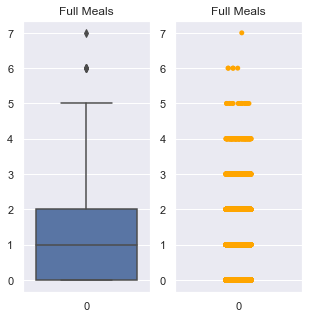

In [38]:
fig, (ax1, ax2) = plt.subplots(figsize=(5, 5), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['Full_meals_eaten'], ax = ax1).set(title="Full Meals")
sns.stripplot(data=medical_df['Full_meals_eaten'], ax=ax2, color='orange').set(title="Full Meals")
plt.show()

In [39]:
print("\nFull meals eaten: \n",medical_df['Full_meals_eaten'].describe())

# Calculate the bound.
lower_bound = medical_df['Full_meals_eaten'].quantile(0.25)
upper_bound = medical_df['Full_meals_eaten'].quantile(0.75)
IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
# threshold = 1.5
outliers = medical_df[(medical_df['Full_meals_eaten']  < lower_bound - threshold * IQR ) 
                 |(medical_df['Full_meals_eaten']  > upper_bound + threshold * IQR )] 

print("\nOutliers shape:",outliers.shape)
print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)
print("\nOutliers shape: ", outliers.shape)

medical_df= medical_df.drop(outliers.index)
print("\nNulls in full meals eatens frame After: ", medical_df['Full_meals_eaten'].isna().sum())
print("\nfull meals eaten shape after drop: ",medical_df.shape)
print("\nfull meals eaten \n",medical_df['Full_meals_eaten'].describe())


Full meals eaten: 
 count    8184.000000
mean        1.005010
std         1.006201
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Full_meals_eaten, dtype: float64

Outliers shape: (6, 53)
Lower bound:  0.0
Upper bound:  2.0

Outliers shape:  (6, 53)

Nulls in full meals eatens frame After:  0

full meals eaten shape after drop:  (8178, 53)

full meals eaten 
 count    8178.000000
mean        1.001223
std         0.996753
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: Full_meals_eaten, dtype: float64


### Vitamin D Supplements

View of the popuation sample relative to the boxplot.
This columns doee not ??????? 

In [40]:
print(medical_df['VitD_supp'].describe())

count    8178.000000
mean        0.392639
std         0.622657
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: VitD_supp, dtype: float64


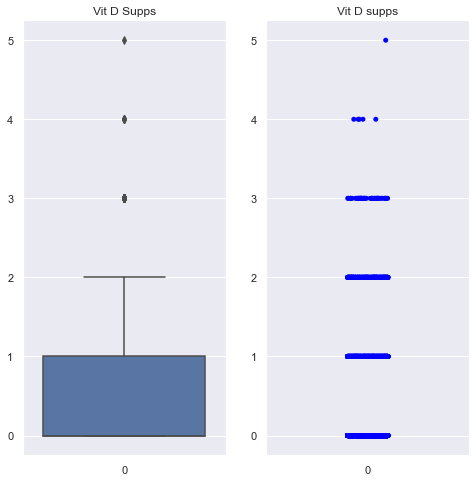

In [41]:
sns.set(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['VitD_supp'], ax = ax1).set(title="Vit D Supps")
sns.stripplot(data=medical_df['VitD_supp'], ax=ax2, color='blue').set(title="Vit D supps")
plt.show()

In [42]:
print("\nVitamin D supps: \n",medical_df['VitD_supp'].describe())

# Calculate the bound.
lower_bound = medical_df['VitD_supp'].quantile(0.25)
upper_bound = medical_df['VitD_supp'].quantile(0.75)
IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
# threshold = 1.5
outliers = medical_df[(medical_df['VitD_supp']  < lower_bound - threshold * IQR ) 
                 |(medical_df['VitD_supp']  > upper_bound + threshold * IQR )] 

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)
print("Outliers shape: ", outliers.shape)

medical_df= medical_df.drop(outliers.index)
print("\nVit D supps shape after drop: ",medical_df.shape)
print("\nVit D supps \n",medical_df['VitD_supp'].describe())


Vitamin D supps: 
 count    8178.000000
mean        0.392639
std         0.622657
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: VitD_supp, dtype: float64
Lower bound:  0.0
Upper bound:  1.0
Outliers shape:  (52, 53)

Vit D supps shape after drop:  (8126, 53)

Vit D supps 
 count    8126.000000
mean        0.375092
std         0.583751
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: VitD_supp, dtype: float64


### Initial Days

View of the population sample relative to the boxplot.

In [43]:
print(medical_df['Initial_days'].describe())

count    7286.000000
mean       34.392833
std        26.342434
min         1.001981
25%         7.908866
50%        30.841461
75%        61.225851
max        71.981486
Name: Initial_days, dtype: float64


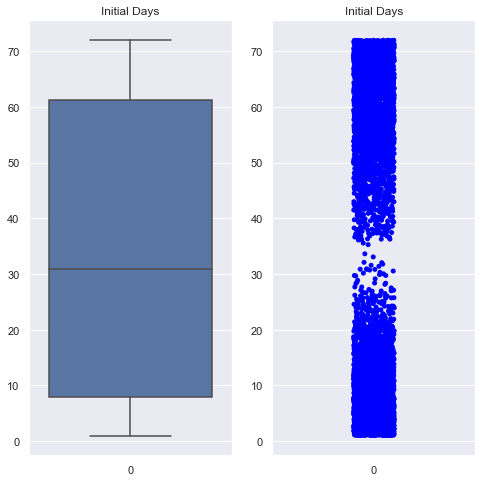

In [44]:
sns.set(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['Initial_days'], ax = ax1).set(title="Initial Days")
sns.stripplot(data=medical_df['Initial_days'], ax=ax2, color='blue').set(title="Initial Days")
plt.show()

In [45]:
print("Initial Days: \n",medical_df['Initial_days'].describe())

# Calculate the bound.
lower_bound = medical_df['Initial_days'].quantile(0.25)
upper_bound = medical_df['Initial_days'].quantile(0.75)
IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
# threshold = 1.5
outliers = medical_df[(medical_df['Initial_days']  < lower_bound - threshold * IQR ) 
                 |(medical_df['Initial_days']  > upper_bound + threshold * IQR )] 

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)
print("Outliers shape: ", outliers.shape)

medical_df= medical_df.drop(outliers.index)

print("\nInitial Days shape after drop: ",medical_df.shape)
print("\nInitial Days \n",medical_df['Initial_days'].describe())

Initial Days: 
 count    7286.000000
mean       34.392833
std        26.342434
min         1.001981
25%         7.908866
50%        30.841461
75%        61.225851
max        71.981486
Name: Initial_days, dtype: float64
Lower bound:  7.908866235
Upper bound:  61.2258513175
Outliers shape:  (0, 53)

Initial Days shape after drop:  (8126, 53)

Initial Days 
 count    7286.000000
mean       34.392833
std        26.342434
min         1.001981
25%         7.908866
50%        30.841461
75%        61.225851
max        71.981486
Name: Initial_days, dtype: float64


### Total Charge

View of the population sample relative to the boxplot.

In [46]:
print(medical_df['TotalCharge'].describe())

count     8126.000000
mean      5311.059382
std       2214.624939
min       1256.751699
25%       3205.880424
50%       5177.381494
75%       7460.753015
max      10223.333770
Name: TotalCharge, dtype: float64


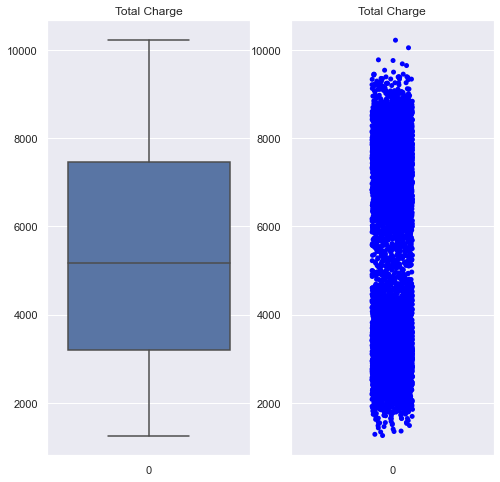

In [47]:
sns.set(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['TotalCharge'], ax = ax1).set(title="Total Charge")
sns.stripplot(data=medical_df['TotalCharge'], ax=ax2, color='blue').set(title="Total Charge")
plt.show()

In [48]:
print("\nTotal Charge: \n",medical_df['TotalCharge'].describe())

# Calculate the bound.
lower_bound = medical_df['TotalCharge'].quantile(0.25)
upper_bound = medical_df['TotalCharge'].quantile(0.75)
IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
# threshold = 1.5
outliers = medical_df[(medical_df['TotalCharge']  < lower_bound - threshold * IQR ) 
                 |(medical_df['TotalCharge']  > upper_bound + threshold * IQR )] 

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)
print("Outliers shape: ", outliers.shape)

medical_df= medical_df.drop(outliers.index)

print("\nTotal Charge shape after drop: ",medical_df.shape)
print("\nTotal Charge \n",medical_df['TotalCharge'].describe())


Total Charge: 
 count     8126.000000
mean      5311.059382
std       2214.624939
min       1256.751699
25%       3205.880424
50%       5177.381494
75%       7460.753015
max      10223.333770
Name: TotalCharge, dtype: float64
Lower bound:  3205.880424
Upper bound:  7460.75301475
Outliers shape:  (0, 53)

Total Charge shape after drop:  (8126, 53)

Total Charge 
 count     8126.000000
mean      5311.059382
std       2214.624939
min       1256.751699
25%       3205.880424
50%       5177.381494
75%       7460.753015
max      10223.333770
Name: TotalCharge, dtype: float64


### Additional Charges

View of the population sample relative to the boxplot.
This columns doee not ??????? 

In [49]:
print(medical_df['Additional_charges'].describe())

count     8126.000000
mean     12885.954430
std       6529.634562
min       3125.702716
25%       7959.058499
50%      11523.139040
75%      15533.289677
max      30466.929730
Name: Additional_charges, dtype: float64


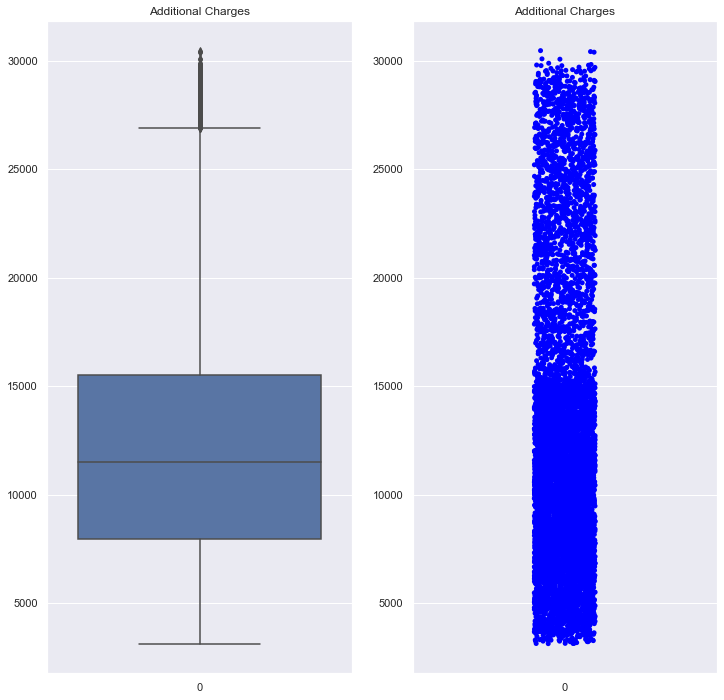

In [50]:
sns.set(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(figsize=(12, 12), ncols=2, sharex= True,
                                    sharey=False)

sns.boxplot(data=medical_df['Additional_charges'], ax = ax1).set(title="Additional Charges")
sns.stripplot(data=medical_df['Additional_charges'], ax=ax2, color='blue').set(title="Additional Charges")
plt.show()

In [51]:
print("\nAdditional Charges: \n",medical_df['Additional_charges'].describe())

# Calculate the bound.
lower_bound = medical_df['Additional_charges'].quantile(0.25)
upper_bound = medical_df['Additional_charges'].quantile(0.75)
IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
# threshold = 1.5
outliers = medical_df[(medical_df['Additional_charges']  < lower_bound - threshold * IQR ) 
                 |(medical_df['Additional_charges']  > upper_bound + threshold * IQR )] 

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)
print("Outliers shape: ", outliers.shape)

medical_df= medical_df.drop(outliers.index)

print("\nAdditional Charges shape after drop: ",medical_df.shape)
print("\nAdditional Charges \n",medical_df['Additional_charges'].describe())


Additional Charges: 
 count     8126.000000
mean     12885.954430
std       6529.634562
min       3125.702716
25%       7959.058499
50%      11523.139040
75%      15533.289677
max      30466.929730
Name: Additional_charges, dtype: float64
Lower bound:  7959.05849875
Upper bound:  15533.289677499999
Outliers shape:  (363, 53)

Additional Charges shape after drop:  (7763, 53)

Additional Charges 
 count     7763.000000
mean     12168.018224
std       5749.916263
min       3125.702716
25%       7801.249403
50%      11239.279490
75%      14725.380760
max      26892.907460
Name: Additional_charges, dtype: float64


## Step 4:     Look for missing values and impute them.  
            
   **Note:**   This corresponds to section C & D of the accompanying document. 

   **Actions:**
   1. Look for missing values that were not caught in previous steps.
   2. Replace the values using appropriate steps.
   
   Columns that will be imputation performed on them (if applicable): Soft_drinks, Overweight, Anxiety, Initial days, 

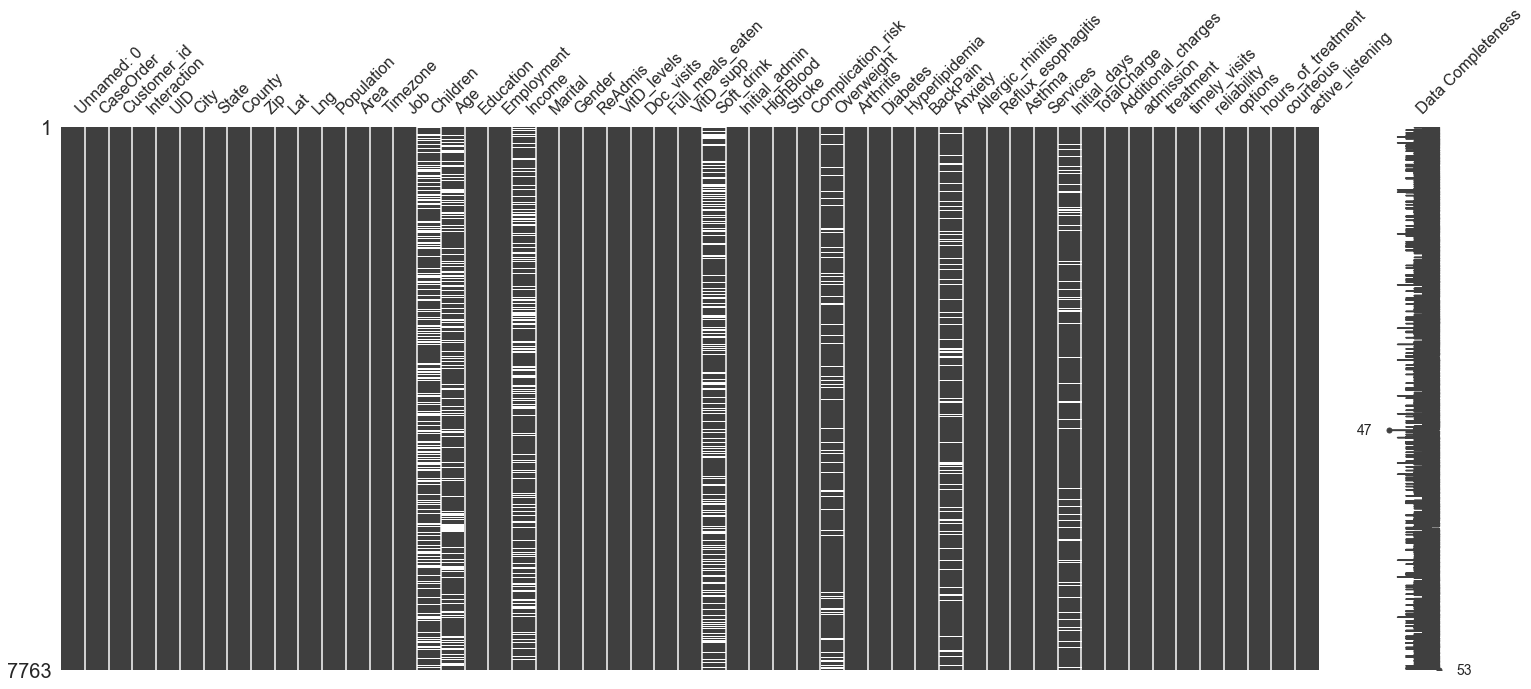

In [52]:
msno.matrix(medical_df, labels=True)


Columns that have missing valeus are Children Age INcome, Soft drink, Overweight, Anxiety, and Initial days.

Number of missing values in Children column 2064

Unique  categories:  ['No' 'Yes' 'Missing']


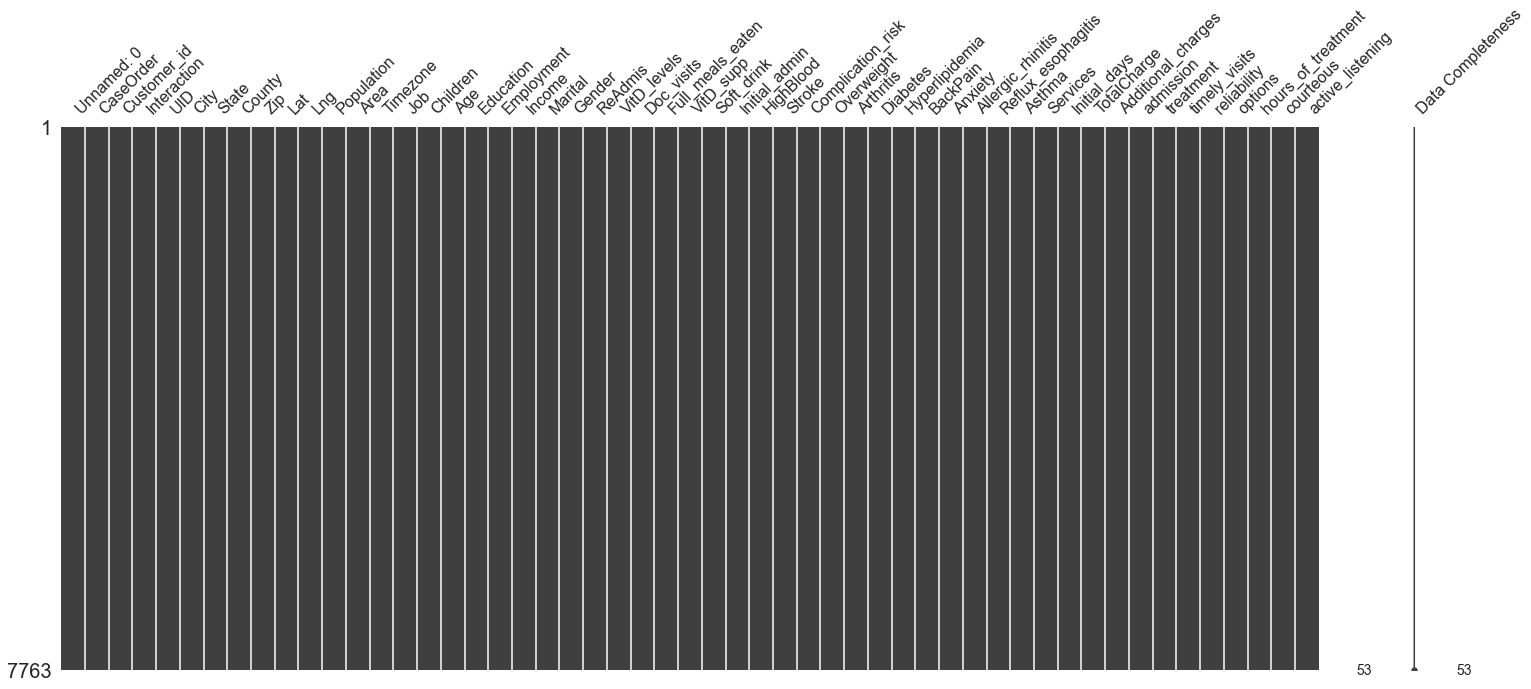

In [53]:
# Fill in missing values in the childrens column
children_nan_count = medical_df['Children'].isna().sum()

print("Number of missing values in Children column", children_nan_count)
medical_df['Children'] = medical_df['Children'].fillna(0)

# Fill in Missing Age
medical_df['Age'] = medical_df['Age'].fillna(math.floor(medical_df['Age'].mean()))

#Fill in missing Income
medical_df['Income'] = medical_df['Income'].fillna(medical_df['Income'].mean())

# Fill in missing soft drink values.
medical_df['Soft_drink'] = medical_df['Soft_drink'].fillna("Missing")

#Fill in Overweight values
medical_df['Overweight'] = medical_df['Overweight'].fillna("Missing")
#Filll in Anxiety values
medical_df['Anxiety'] = medical_df['Anxiety'].fillna("Missing")

print("\nUnique  categories: ", medical_df.Overweight.unique())

#Fill in missing Income
medical_df['Initial_days'] = medical_df['Initial_days'].fillna(medical_df['Initial_days'].mean())

#Show the missing matrix
msno.matrix(medical_df, labels=True)

### Section D5
 Code to save the cleaned file to a CSV.

In [54]:
medical_df.to_csv("Heino_cleaned_medical.csv", index=False)

# E.  Principal Component Analysis

In [55]:
clean_df = pd.read_csv("Heino_cleaned_medical.csv", dtype={'Zip': "str"})

print("Shape of the cleaned CSV after loading: ",clean_df.shape)

Shape of the cleaned CSV after loading:  (7763, 53)


In [56]:
print("Columns of the dataframe: \n\n",clean_df.columns)
print("Cleaned dataframe types", clean_df.dtypes)

Columns of the dataframe: 

 Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'admission',
       'treatment', 'timely_visits', 'reliability', 'options',
       'hours_of_treatment', 'courteous', 'active_listening'],
      dtype='object')
Cleaned dataframe types Unnamed: 0              int64
CaseOrder               int64
Customer_id            object
Interaction            object
UID                    obje

In [57]:
pca_df = clean_df[['Lat','Lng','Population','Children','Age', 'Income', 'VitD_levels'
                   ,'Doc_visits','Full_meals_eaten','VitD_supp','Initial_days', 'TotalCharge'
                   ,'Additional_charges']]

In [58]:
#print("Columns of the dataframe: \n\n",pca_df.columns)
print("\nPCA dataframe types: \n\n", pca_df.dtypes)


PCA dataframe types: 

 Lat                   float64
Lng                   float64
Population              int64
Children              float64
Age                   float64
Income                float64
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
VitD_supp               int64
Initial_days          float64
TotalCharge           float64
Additional_charges    float64
dtype: object


In [59]:
print("Values: ", pca_df.Children.values)

Values:  [1. 3. 3. ... 0. 3. 3.]


The PCA analysis was completed using steps oultined in "Dimensionality Reduction in Python" by J. Boeye a Datacamp video and WGU course resource.

In [60]:
medical_normalized = (pca_df - pca_df.mean())/pca_df.std()

In [61]:
pca = PCA(n_components = pca_df.shape[1])
print(pca)

PCA(n_components=13)


In [62]:
# Fit the data
pca.fit(medical_normalized)

PCA(n_components=13)

In [63]:
medical_pca= pd.DataFrame(pca.transform(medical_normalized))
columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']

loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5'
                        ,'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']
                        , index=pca_df.columns)

In [64]:
print("The loadings matrix: ")
print(loadings)

The loadings matrix: 
                         PC1       PC2       PC3       PC4       PC5  \
Lat                -0.016647 -0.025699  0.658033  0.046381  0.007002   
Lng                -0.010417  0.044675 -0.481665 -0.075536 -0.132019   
Population          0.024791 -0.009347 -0.569380  0.012082  0.061573   
Children            0.002186  0.004259 -0.048306  0.079969  0.648856   
Age                 0.017590  0.704269  0.023299  0.036631 -0.034848   
Income             -0.009482 -0.016514 -0.075169  0.463363  0.236000   
VitD_levels         0.053140  0.039420  0.038407 -0.548051  0.318307   
Doc_visits         -0.010353  0.016677  0.007214  0.210853  0.579727   
Full_meals_eaten   -0.025161  0.033323  0.006954 -0.481664  0.019452   
VitD_supp           0.044594 -0.019700 -0.000290  0.435435 -0.250228   
Initial_days        0.703073 -0.030405  0.010711  0.027756 -0.014241   
TotalCharge         0.705833 -0.010422  0.013119 -0.024722  0.013114   
Additional_charges  0.023050  0.704704  0.

### Selection of the Principal Components


In [65]:
# Creating the covariance matrix
cov_matrix = np.dot(medical_normalized.T, medical_normalized) / pca_df.shape[0]

# Eigen values
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]


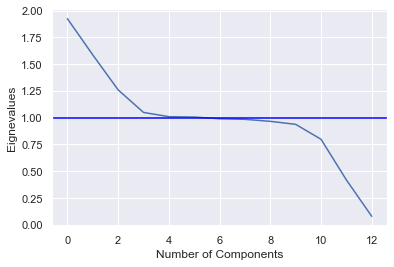

In [66]:
# Create the Scree plot.
# using matplotlib

plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eignevalues')
plt.axhline(y=1, color="blue")
# Show the plot
plt.show()

### Ancillary Findings


In [67]:
print("Variance ratio explained: \n", pca.explained_variance_ratio_)
print("\n\nCummulative sum method:\n",pca.explained_variance_ratio_.cumsum())

Variance ratio explained: 
 [0.14801397 0.12199486 0.09685255 0.08065945 0.07760156 0.07733396
 0.07610441 0.07568852 0.07424766 0.07209204 0.06135055 0.03210724
 0.00595322]


Cummulative sum method:
 [0.14801397 0.27000883 0.36686138 0.44752083 0.52512239 0.60245635
 0.67856077 0.75424929 0.82849695 0.90058899 0.96193954 0.99404678
 1.        ]


To keep about 90% of the variance there is a need to keep 10 of the components.